<a href="https://colab.research.google.com/github/SunnyShrestha-repo/LearningML/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data description: https://cseweb.ucsd.edu//classes/sp15/cse190-c/reports/sp15/048.pdf

**MAIN GOAL OF THE ASSIGNMENT:**

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.


In [ ]:
# Add additional Python packages that we will be using in class
!apt install graphviz build-essential checkinstall imagemagick
# Base Python packages to run example Jupyter Notebooks
!pip install watermark pyprind mlxtend
# Python packages to visualize Decision Tree Classifiers
!pip install pydotplus graphviz pyparsing
# Python packages for Natrual Language Processing
!pip install nltk
# Python packages for Flask-based web applications
!pip install flask wtforms
# Python packages for TensorFlow
!pip install tensorflow tensorflow-datasets

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  file fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagic-mgc libmagic1 libmagickcore-6.q16-3
  libmagickcore-6.q16-3-extra libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7
  netpbm poppler-data
Suggested packages:
  gettext fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr
  | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray
  radiance sane-utils texlive-base-bin transfig ufraw-batch inkscape
  libjxr-tools libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ip

In [ ]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch03 FOLDER #####
google_drive_root='/machine-learning/project1'

In [ ]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

In [ ]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

KeyboardInterrupt: ignored

In [ ]:
google_file_prefix+'inc_occ_gender.csv'

'/content/drive/My Drive//machine-learning/project1/inc_occ_gender.csv'

**DATA COLLECTION**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from io import StringIO
import sys

# df_labor = pd.read_csv(google_file_prefix+'inc_occ_gender.csv',
#                       header=0)

# df_survey = pd.read_csv(google_file_prefix+'surveyResult.csv',
#                       header=0)

df_income = pd.read_csv(google_file_prefix+'income_evaluation.csv', header=None, skiprows=1)
# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

# df_anneal.columns = ['family', 'product-type', 'steel', 'carbon',
#                    'hardness', 'temper_rolling', 'condition',
#                    'formability', 'strength', 'non-ageing',
#                    'surface-finish', 'surface-quality', 'enamelability', 'bc',
#                    'bf', 'bt', 'bw/me',
#                    'bl', 'm', 'chrom',
#                    'phos', 'cbond', 'marvi',
#                    'exptl', 'ferro', 'corr', 'bbvc',
#                    'lustre', 'jurofm', 's',
#                    'p', 'shape', 'thick',
#                    'width', 'len', 'oil', 'bore', 'packing', 'classes']

df_income.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# print('Class labels', np.unique(df_wine['Class label']))
df_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**DATA PREPROCESSING/CLEANING**

In [ ]:
df_income.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [ ]:
exists = ' ?' in df_income
exists

False

In [ ]:
df_income.loc[df_income['fnlwgt']==212759]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
25321,66,?,212759,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,6767,0,20,United-States,<=50K


In [ ]:
df_income.loc[df_income['workclass']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [ ]:
# df_survey = df_survey.drop(columns=['Timestamp', 'comments'])
# df_survey

In [ ]:
# df_surveyUSA = df_survey[df_survey['Country']=="United States"]
# df_surveyUSA

In [ ]:
# df_surveyUSA.isnull().sum()

In [ ]:
#Dropping the rows with NaN values in categorical data 
# df_surveyUSA = df_surveyUSA.dropna(axis=0)  
# df_surveyUSA

In [ ]:
# df_survey['M'] = df_survey['Gender'].apply(lambda x: 1 if (x.lower().startswith('m') || "man" in x.lower()) else 0)
# df_survey['F'] = df_survey['Gender'].apply(lambda x: 1 if x.lower().startswith('f') else 0)
# df_survey

In [ ]:
df_income = df_income.replace({' ?': np.NaN})
df_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_income.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [ ]:
df_income = df_income.dropna(axis=0)  
df_income

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_income['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [ ]:
df_income['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [ ]:
df_income['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
df_income['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [ ]:
df_income['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [ ]:
df_income['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [ ]:
import numpy as np
class_mapping = {label: idx for idx, label in enumerate(np.unique(df_income['income']))}

In [ ]:
df_income['income'] = df_income['income'].map(class_mapping)
df_income

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
df_income['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
df_income['PrimarySchool'] = df_income['education'].apply(lambda x: 1 if x in 
                                                        (' Preschool', ' 5th-6th',' 7th-8th',' 1st-4th') else 0)
df_income['HighSchool'] = df_income['education'].apply(lambda x: 1 if x in 
                                                        (' 10th', ' 12th',' HS-grad', ' 11th',' 9th') else 0)
df_income['SomeCollege'] = df_income['education'].apply(lambda x: 1 if x in 
                                                        (' Some-college', ' Assoc-acdm', ' Assoc-voc', ' Prof-school') else 0)
df_income['BachelorsDegree'] = df_income['education'].apply(lambda x: 1 if x == ' Bachelors' else 0)
df_income['GraduateDegree'] = df_income['education'].apply(lambda x: 1 if x in 
                                                        ( ' Doctorate',' Masters') else 0)


del df_income['education']

df_income

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,PrimarySchool,HighSchool,SomeCollege,BachelorsDegree,GraduateDegree
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,0,0,1,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,1,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,1,0,0,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,1,0,0,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0,0,1,0,0
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0,1,0,0,0
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,1,0,0,0
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0,1,0,0,0


In [ ]:
df_income['GovJob'] = df_income['workclass'].apply(lambda x: 1 if x in 
                                                        (' State-gov', ' Local-gov', ' Federal-gov') else 0)
df_income['PrivateOthers'] = df_income['workclass'].apply(lambda x: 1 if x in 
                                                        (' Private', ' Without-pay') else 0)
df_income['SelfEmp'] = df_income['workclass'].apply(lambda x: 1 if x in 
                                                        (' Self-emp-not-inc', ' Self-emp-inc') else 0)

del df_income['workclass']

df_income

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,age,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,PrimarySchool,HighSchool,SomeCollege,BachelorsDegree,GraduateDegree,GovJob,PrivateOthers,SelfEmp
0,39,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0,0,0,1,0,1,0,0
1,50,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,1,0,0,0,1
2,38,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,1,0,0,0,0,1,0
3,53,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,1,0,0,0,0,1,0
4,28,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0,0,1,0,0,0,1,0
32557,40,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0,1,0,0,0,0,1,0
32558,58,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,1,0,0,0,0,1,0
32559,22,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0,1,0,0,0,0,1,0


In [ ]:
# df['x > M'] = df['native-country'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df_income['Europe'] = df_income['native-country'].apply(lambda x: 1 if x in 
                                                        (' England', ' Portugal',' Germany', ' Yugoslavia', ' Poland', ' France', ' Italy', ' Scotland', ' Greece', ' Ireland', ' Hungary', ' Holand-Netherlands') else 0)
df_income['CentralAmerica'] = df_income['native-country'].apply(lambda x: 1 if x in 
                                                        (' Mexico', ' Guatemala', ' Honduras', ' Nicaragua', ' El-Salvador') else 0)
df_income['NorthAmerica'] = df_income['native-country'].apply(lambda x: 1 if x in 
                                                        (' United-States', ' Canada', ' Outlying-US(Guam-USVI-etc)') else 0)
df_income['SouthAmerica'] = df_income['native-country'].apply(lambda x: 1 if x in 
                                                        (' Peru', ' Columbia', ' Ecuador') else 0)
df_income['Carribean'] = df_income['native-country'].apply(lambda x: 1 if x in 
                                                        ( ' Puerto-Rico', ' Cuba', ' Jamaica', ' Trinadad&Tobago', ' Haiti', ' Dominican-Republic') else 0)
df_income['Asia'] = df_income['native-country'].apply(lambda x: 1 if x in 
                                                        ( ' Hong', ' Taiwan', ' China', ' Japan',  ' India', ' Iran', ' Philippines', ' Cambodia', ' Thailand', ' South', ' Laos', ' Vietnam') else 0)


del df_income['native-country']

df_income

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,age,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,PrimarySchool,HighSchool,SomeCollege,BachelorsDegree,GraduateDegree,GovJob,PrivateOthers,SelfEmp,Europe,CentralAmerica,NorthAmerica,SouthAmerica,Carribean,Asia
0,39,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,50,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,38,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,53,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,28,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
32557,40,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
32558,58,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
32559,22,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
df_income.head()

,age,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income,PrimarySchool,HighSchool,SomeCollege,BachelorsDegree,GraduateDegree,GovJob,PrivateOthers,SelfEmp,Europe,CentralAmerica,NorthAmerica,SouthAmerica,Carribean,Asia
0,39,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
1,50,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
2,38,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,53,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
4,28,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [ ]:
categorical_columns = [ 'marital-status', 'occupation', 'relationship', 'race', 'sex', ]
for column in categorical_columns:
    tempdf = pd.get_dummies(df_income[column], prefix=column)
    df_income = pd.merge(
        left=df_income,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    df_income = df_income.drop(columns=column)
df_income

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,PrimarySchool,HighSchool,SomeCollege,BachelorsDegree,GraduateDegree,GovJob,PrivateOthers,SelfEmp,Europe,CentralAmerica,NorthAmerica,SouthAmerica,Carribean,Asia,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
32557,40,154374,9,0,0,40,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
32558,58,151910,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
32559,22,201490,9,0,0,20,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [ ]:
df_income

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,PrimarySchool,HighSchool,SomeCollege,BachelorsDegree,GraduateDegree,GovJob,PrivateOthers,SelfEmp,Europe,CentralAmerica,NorthAmerica,SouthAmerica,Carribean,Asia,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,77516,13,2174,0,40,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
32557,40,154374,9,0,0,40,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
32558,58,151910,9,0,0,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
32559,22,201490,9,0,0,20,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


**DATA PARTITION & STANDARDIZATION**

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_income.iloc[:, 1:].values, df_income['income'].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

**MODEL COMPARISON**

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [ ]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
df_income.columns.values

array(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'PrimarySchool', 'HighSchool',
       'SomeCollege', 'BachelorsDegree', 'GraduateDegree', 'GovJob',
       'PrivateOthers', 'SelfEmp', 'Europe', 'CentralAmerica',
       'NorthAmerica', 'SouthAmerica', 'Carribean', 'Asia',
       'marital-status_ Divorced', 'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occu

In [ ]:
df_income2= df_income.loc[:, df_income.columns != 'income']
df_income2.columns[0:]

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'PrimarySchool', 'HighSchool', 'SomeCollege',
       'BachelorsDegree', 'GraduateDegree', 'GovJob', 'PrivateOthers',
       'SelfEmp', 'Europe', 'CentralAmerica', 'NorthAmerica', 'SouthAmerica',
       'Carribean', 'Asia', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Te

 1) hours-per-week                 0.687218
 2) marital-status_ Married-civ-spouse 0.056900
 3) education-num                  0.048032
 4) fnlwgt                         0.035760
 5) relationship_ Husband          0.032541
 6) marital-status_ Never-married  0.016930
 7) capital-loss                   0.015846
 8) age                            0.011859
 9) capital-gain                   0.010186
10) HighSchool                     0.008374
11) GraduateDegree                 0.007511
12) occupation_ Exec-managerial    0.007464
13) relationship_ Own-child        0.005992
14) relationship_ Wife             0.005372
15) BachelorsDegree                0.005260
16) occupation_ Prof-specialty     0.005147
17) sex_ Female                    0.004810
18) relationship_ Not-in-family    0.004695
19) sex_ Male                      0.003670
20) marital-status_ Divorced       0.002348
21) SomeCollege                    0.002180
22) occupation_ Other-service      0.002061
23) relationship_ Unmarried 

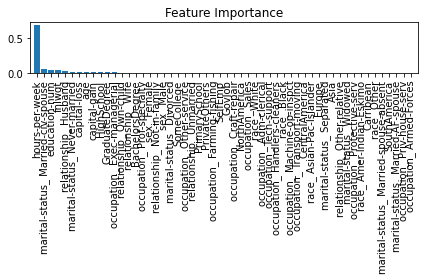

In [ ]:
from sklearn.ensemble import RandomForestClassifier

df_income2= df_income.loc[:, df_income.columns != 'income']
feat_labels = df_income2.columns[0:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig(google_file_prefix + 'images/04_09.png', dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.02, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [ ]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) hours-per-week                 0.687218
 2) marital-status_ Married-civ-spouse 0.056900
 3) education-num                  0.048032
 4) fnlwgt                         0.035760
 5) relationship_ Husband          0.032541


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score

y_svm_pred = svm.predict(X_test_std)
y_tree_pred = forest.predict(X_test_std)
y_knn_pred = knn.predict(X_test_std)

print('Random Forest Accuracy: %.3f' % accuracy_score(y_test, y_tree_pred))
print('SVM Accuracy: %.3f' % accuracy_score(y_test, y_svm_pred))
print('KNN Accuracy: %.3f' % accuracy_score(y_test, y_knn_pred))

Random Forest Accuracy: 1.000
SVM Accuracy: 1.000
KNN Accuracy: 0.958
